- 均线：对于每一个交易日，都可以计算出前N天的移动平均值，然后把这些移动平均值连起来，成为一条线，就叫做N日移动平均线。常用移动平均线有5天，10天，30天，60天，120天和240天。
    - 5天和10天是短线操作的参考指标，称为日均线指标；
    - 30天和60天是中期均线指标，称为季均线指标；
    - 120天和240天是长期均线指标，称为年均线指标。
    
- 金叉：短期均线上穿长期均线，买入信号
- 死叉：短期均线下穿长期均线，卖出信号


In [1]:
import numpy as np
import pandas as pd
#pd.set_option('display.max_colums',20)
#pd.set_option('display.max_rows',100)
#pd.set_option('display.float_format',lambda x: '%.5f' % x)

import matplotlib.pyplot as plt
import tushare as ts

In [2]:
# df = ts.get_k_data("601318",start='1990-01-01')
# df.to_csv("601318.csv")

In [3]:
#df = pd.read_csv("601318.csv", index_col='date', parse_dates=['date'])[['open','close','high','low']]
df = pd.read_csv("601318.csv", index_col='date', parse_dates=['date'])
df

,Unnamed: 0,open,close,high,low,volume,code
date,,,,,,,
2007-03-01,0,21.254,19.890,21.666,19.469,1977633.51,601318
2007-03-02,1,19.979,19.728,20.166,19.503,425048.32,601318
2007-03-05,2,19.545,18.865,19.626,18.504,419196.74,601318
2007-03-06,3,18.704,19.235,19.554,18.597,297727.88,601318
2007-03-07,4,19.252,19.758,19.936,19.090,287463.78,601318
...,...,...,...,...,...,...,...
2020-06-23,3173,72.500,71.960,72.600,71.670,779636.00,601318
2020-06-24,3174,72.250,72.260,72.850,72.010,605136.00,601318
2020-06-29,3175,72.070,71.010,72.260,70.800,714838.00,601318


In [4]:
# df['ma5'] = np.nan
# df['ma30'] = np.nan

# for i in range(4, len(df)):
#     df.loc[df.index[i],'ma5'] = df['close'][i-4:i+1].mean()
    
# for i in range(29, len(df)):
#     df.loc[df.index[i],'ma30'] = df['close'][i-29:i+1].mean()

df['ma5'] = df['close'].rolling(5).mean()  #rolling()函数
df['ma30'] = df['close'].rolling(30).mean()
df

,Unnamed: 0,open,close,high,low,volume,code,ma5,ma30
date,,,,,,,,,
2007-03-01,0,21.254,19.890,21.666,19.469,1977633.51,601318,NaN,NaN
2007-03-02,1,19.979,19.728,20.166,19.503,425048.32,601318,NaN,NaN
2007-03-05,2,19.545,18.865,19.626,18.504,419196.74,601318,NaN,NaN
2007-03-06,3,18.704,19.235,19.554,18.597,297727.88,601318,NaN,NaN
2007-03-07,4,19.252,19.758,19.936,19.090,287463.78,601318,19.4952,NaN
...,...,...,...,...,...,...,...,...,...
2020-06-23,3173,72.500,71.960,72.600,71.670,779636.00,601318,72.9120,73.046000
2020-06-24,3174,72.250,72.260,72.850,72.010,605136.00,601318,72.7620,73.010000
2020-06-29,3175,72.070,71.010,72.260,70.800,714838.00,601318,72.2840,72.969333


<function matplotlib.pyplot.show(*args, **kw)>

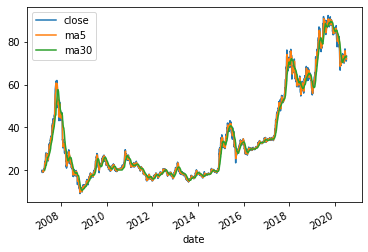

In [5]:
df[['close','ma5','ma30']].plot()
plt.show

In [6]:
df = df.dropna() # 去掉nan数据
df = df['2010-01-01':]

In [7]:
# golden_cross = []
# death_cross = []
# for i in range(1,len(df)):
#     if df['ma5'][i] >= df['ma30'][i] and df['ma5'][i-1] < df['ma30'][i-1]:
#         golden_cross.append(df.index[i].to_pydatetime())
#     if df['ma5'][i] <= df['ma30'][i] and df['ma5'][i-1] > df['ma30'][i-1]:
#         death_cross.append(df.index[i].to_pydatetime())
        
# death_cross
# golden_cross

sr1 = df['ma5'] < df['ma30']
sr2 = df['ma5'] >= df['ma30']

death_cross = df[sr1 & sr2.shift(1)].index

golden_cross = df[~(sr1 | sr2.shift(1))].index

#death_cross
#type(golden_cross)

# df1 = pd.DataFrame(list(zip(golden_cross,death_cross)),columns=['golden_cross','death_cross'])
# df1

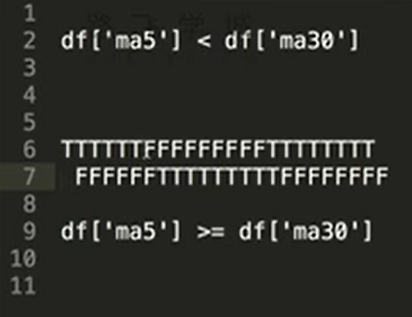

In [8]:
from IPython.display import Image
Image(filename="golden_cross1.png")

In [9]:
first_money = 100000
money = first_money
hold = 0

sr1 = pd.Series(1,index=golden_cross)
sr2 = pd.Series(0,index=death_cross)
# sr = sr1.add(sr2,fill_value=0)
sr = sr1.append(sr2).sort_index()

for i in range(0, len(sr)):
    p = df['open'][sr.index[i]]
    if sr.iloc[i] == 1:  #金叉买入
        buy = money // (100 * p)  # 买了多少手股票
        hold += buy * 100 
        money -= buy * 100 * p
    else:
        money += hold * p
        hold = 0
p = df['open'][-1]    
now_money = hold * p + money
print(now_money - first_money)


381000.79999999976


In [10]:
sr

date
2010-03-22    1
2010-04-29    0
2010-06-23    1
2010-11-16    0
2010-12-09    1
             ..
2020-02-03    0
2020-04-20    1
2020-05-22    0
2020-06-03    1
2020-06-23    0
Length: 124, dtype: int64

In [11]:
sr.loc['2010-04-29']

0

In [12]:
first_money = 100000
money = first_money
hold = 0

sr1 = pd.Series(1,index=golden_cross)
sr2 = pd.Series(0,index=death_cross)
# sr = sr1.add(sr2,fill_value=0)
sr = sr1.append(sr2).sort_index()

for ind in sr.index:
    p = df['open'][ind]
    if sr.loc[ind] == 1:  #金叉买入
        buy = money // (100 * p)  # 买了多少手股票
        hold += buy * 100 
        money -= buy * 100 * p
    else:
        money += hold * p
        hold = 0
p = df['open'][-1]    
now_money = hold * p + money
print(now_money - first_money)

381000.79999999976


In [13]:
df

,Unnamed: 0,open,close,high,low,volume,code,ma5,ma30
date,,,,,,,,,
2010-01-04,683,24.153,23.456,24.196,23.430,293640.12,601318,23.3536,24.370333
2010-01-05,684,23.517,23.752,24.027,22.986,360157.62,601318,23.5442,24.297333
2010-01-06,685,23.678,23.248,23.896,23.200,332046.02,601318,23.6374,24.214367
2010-01-07,686,23.243,22.817,23.422,22.577,365418.19,601318,23.4504,24.120800
2010-01-08,687,22.817,22.682,22.817,22.329,323021.82,601318,23.1910,24.000100
...,...,...,...,...,...,...,...,...,...
2020-06-23,3173,72.500,71.960,72.600,71.670,779636.00,601318,72.9120,73.046000
2020-06-24,3174,72.250,72.260,72.850,72.010,605136.00,601318,72.7620,73.010000
2020-06-29,3175,72.070,71.010,72.260,70.800,714838.00,601318,72.2840,72.969333


In [14]:
df.index.get_loc('2010-01-04')

0

In [15]:
sr

date
2010-03-22    1
2010-04-29    0
2010-06-23    1
2010-11-16    0
2010-12-09    1
             ..
2020-02-03    0
2020-04-20    1
2020-05-22    0
2020-06-03    1
2020-06-23    0
Length: 124, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

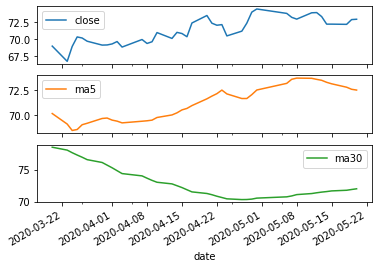

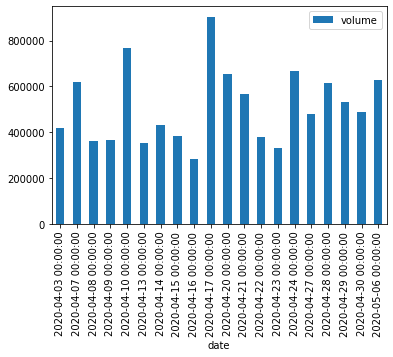

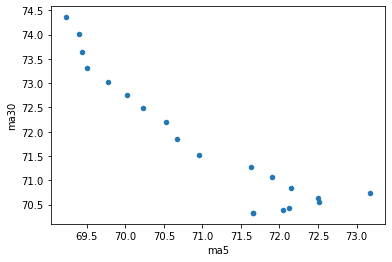

In [31]:
ind = df.index.get_loc('2020-4-20')
df[['close','ma5','ma30']][ind-20:ind+20].plot(subplots=True)
df[['volume']][ind-10:ind+10].plot.bar()
df[:][ind-10:ind+10].plot.scatter('ma5','ma30')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

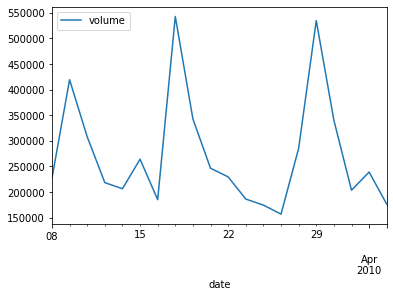

In [17]:
ind = df.index.get_loc('2010-03-22')
df[['volume']][ind-10:ind+10].plot()
plt.show